In [1]:
import pandas as pd
import sklearn

df = pd.read_csv (r'dataset\my_data.csv')
print (df)

               message_id        response_id  empathy  distress  empathy_bin  \
0     R_1hGrPtWM4SumG0U_1  R_1hGrPtWM4SumG0U    5.667     4.375            1   
1     R_1hGrPtWM4SumG0U_2  R_1hGrPtWM4SumG0U    4.833     4.875            1   
2     R_1hGrPtWM4SumG0U_3  R_1hGrPtWM4SumG0U    5.333     3.500            1   
3     R_1hGrPtWM4SumG0U_4  R_1hGrPtWM4SumG0U    4.167     5.250            1   
4     R_1hGrPtWM4SumG0U_5  R_1hGrPtWM4SumG0U    5.333     4.625            1   
...                   ...                ...      ...       ...          ...   
1855  R_DHy2Rcz9Hym8jgl_1  R_DHy2Rcz9Hym8jgl    1.000     1.000            0   
1856  R_DHy2Rcz9Hym8jgl_2  R_DHy2Rcz9Hym8jgl    1.000     1.000            0   
1857  R_DHy2Rcz9Hym8jgl_3  R_DHy2Rcz9Hym8jgl    1.000     1.000            0   
1858  R_DHy2Rcz9Hym8jgl_4  R_DHy2Rcz9Hym8jgl    1.000     1.000            0   
1859  R_DHy2Rcz9Hym8jgl_5  R_DHy2Rcz9Hym8jgl    1.000     1.000            0   

      distress_bin emotion_label  \
0  

In [2]:
#process all the textual data

from textclean import *
df1 = process_text()

In [3]:
#Concate all the features
dff = pd.concat([df1, df[df.columns[8:]]], axis=1)
print(dff)

      aah  aare  abandon  abandoned  abandoning  abbasi  abducted  abed  \
0     0.0   0.0      0.0        0.0         0.0     0.0       0.0   0.0   
1     0.0   0.0      0.0        0.0         0.0     0.0       0.0   0.0   
2     0.0   0.0      0.0        0.0         0.0     0.0       0.0   0.0   
3     0.0   0.0      0.0        0.0         0.0     0.0       0.0   0.0   
4     0.0   0.0      0.0        0.0         0.0     0.0       0.0   0.0   
...   ...   ...      ...        ...         ...     ...       ...   ...   
1855  0.0   0.0      0.0        0.0         0.0     0.0       0.0   0.0   
1856  0.0   0.0      0.0        0.0         0.0     0.0       0.0   0.0   
1857  0.0   0.0      0.0        0.0         0.0     0.0       0.0   0.0   
1858  0.0   0.0      0.0        0.0         0.0     0.0       0.0   0.0   
1859  0.0   0.0      0.0        0.0         0.0     0.0       0.0   0.0   

      abhorrent  abid  ...  income  personality_conscientiousness  \
0           0.0   0.0  ...   5

In [4]:
df['emotion_label']
#sadness   5
#joy       3
#neutral   4 
#fear      2
#disgust   1
#anger     0

0       5
1       3
2       4
3       2
4       4
       ..
1855    3
1856    0
1857    1
1858    6
1859    5
Name: emotion_label, Length: 1860, dtype: int32

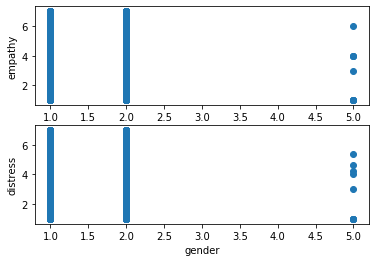

In [6]:
from scatter import *
#use scatterr fuction to plot graph between our selected variable and empathy/destress
scatterr(df['gender'],'gender')

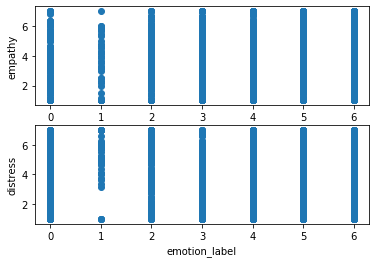

In [7]:
scatterr(df['emotion_label'],'emotion_label')

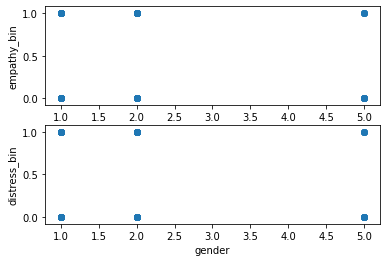

In [3]:
#use scatterr_bin function to plot graph between our selected variable and empathy_bin/distress_bin
scatterr_bin(df['gender'],'gender')

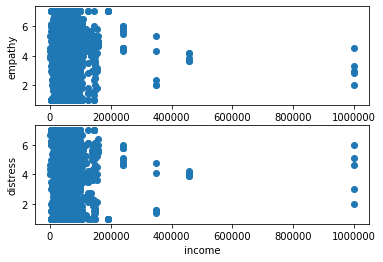

In [5]:
scatterr(df['income'],'income')

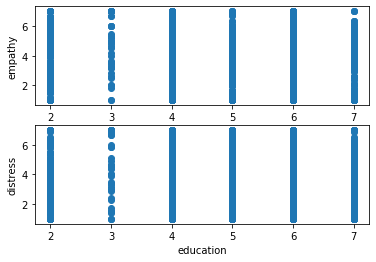

In [7]:
scatterr(df['education'],'education')

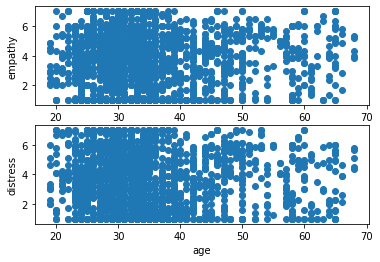

In [8]:
scatterr(df['age'],'age')

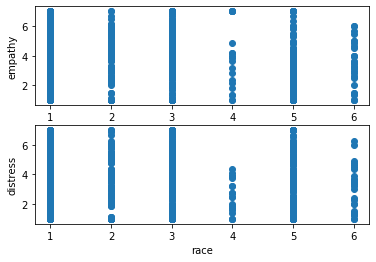

In [9]:
scatterr(df['race'],'race')

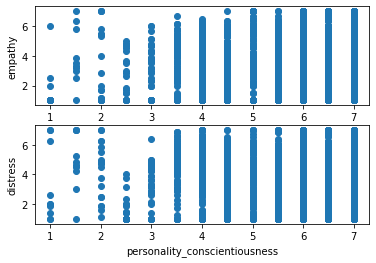

In [10]:
scatterr(df['personality_conscientiousness'],'personality_conscientiousness')

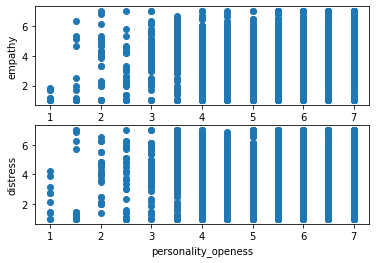

In [11]:
scatterr(df['personality_openess'],'personality_openess')

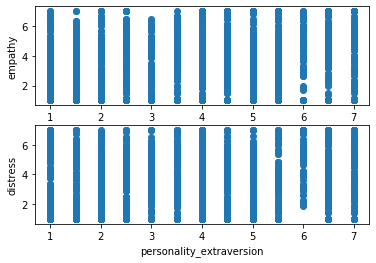

In [12]:
scatterr(df['personality_extraversion'],'personality_extraversion')

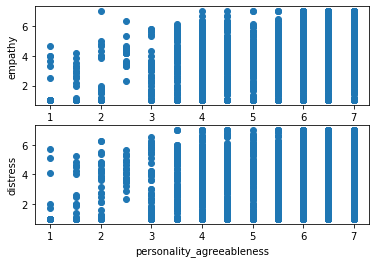

In [13]:
scatterr(df['personality_agreeableness'],'personality_agreeableness')

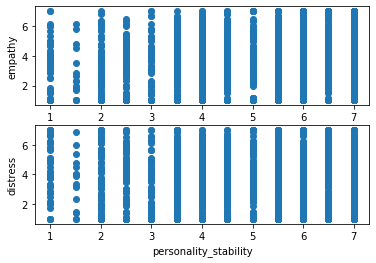

In [44]:
scatterr(df['personality_stability'],'personality_stability')


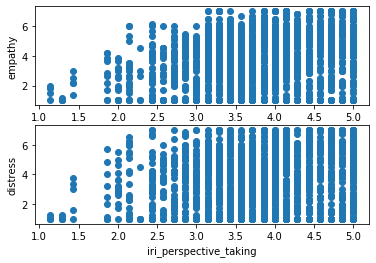

In [45]:
scatterr(df['iri_perspective_taking'],'iri_perspective_taking')

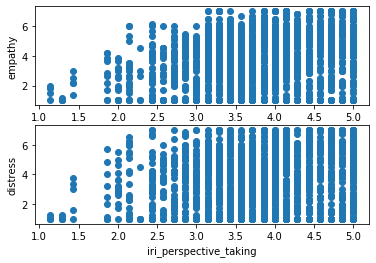

In [46]:
scatterr(df['iri_perspective_taking'],'iri_perspective_taking')

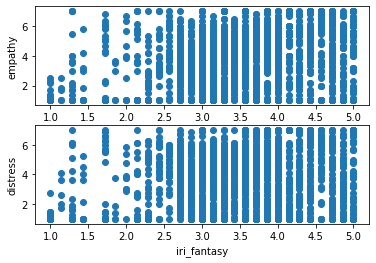

In [47]:
scatterr(df['iri_fantasy'],'iri_fantasy')

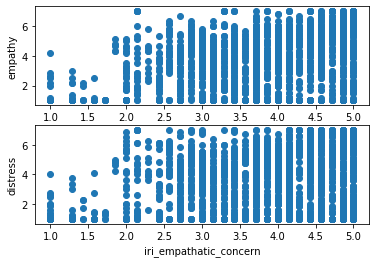

In [48]:
scatterr(df['iri_empathatic_concern'],'iri_empathatic_concern')

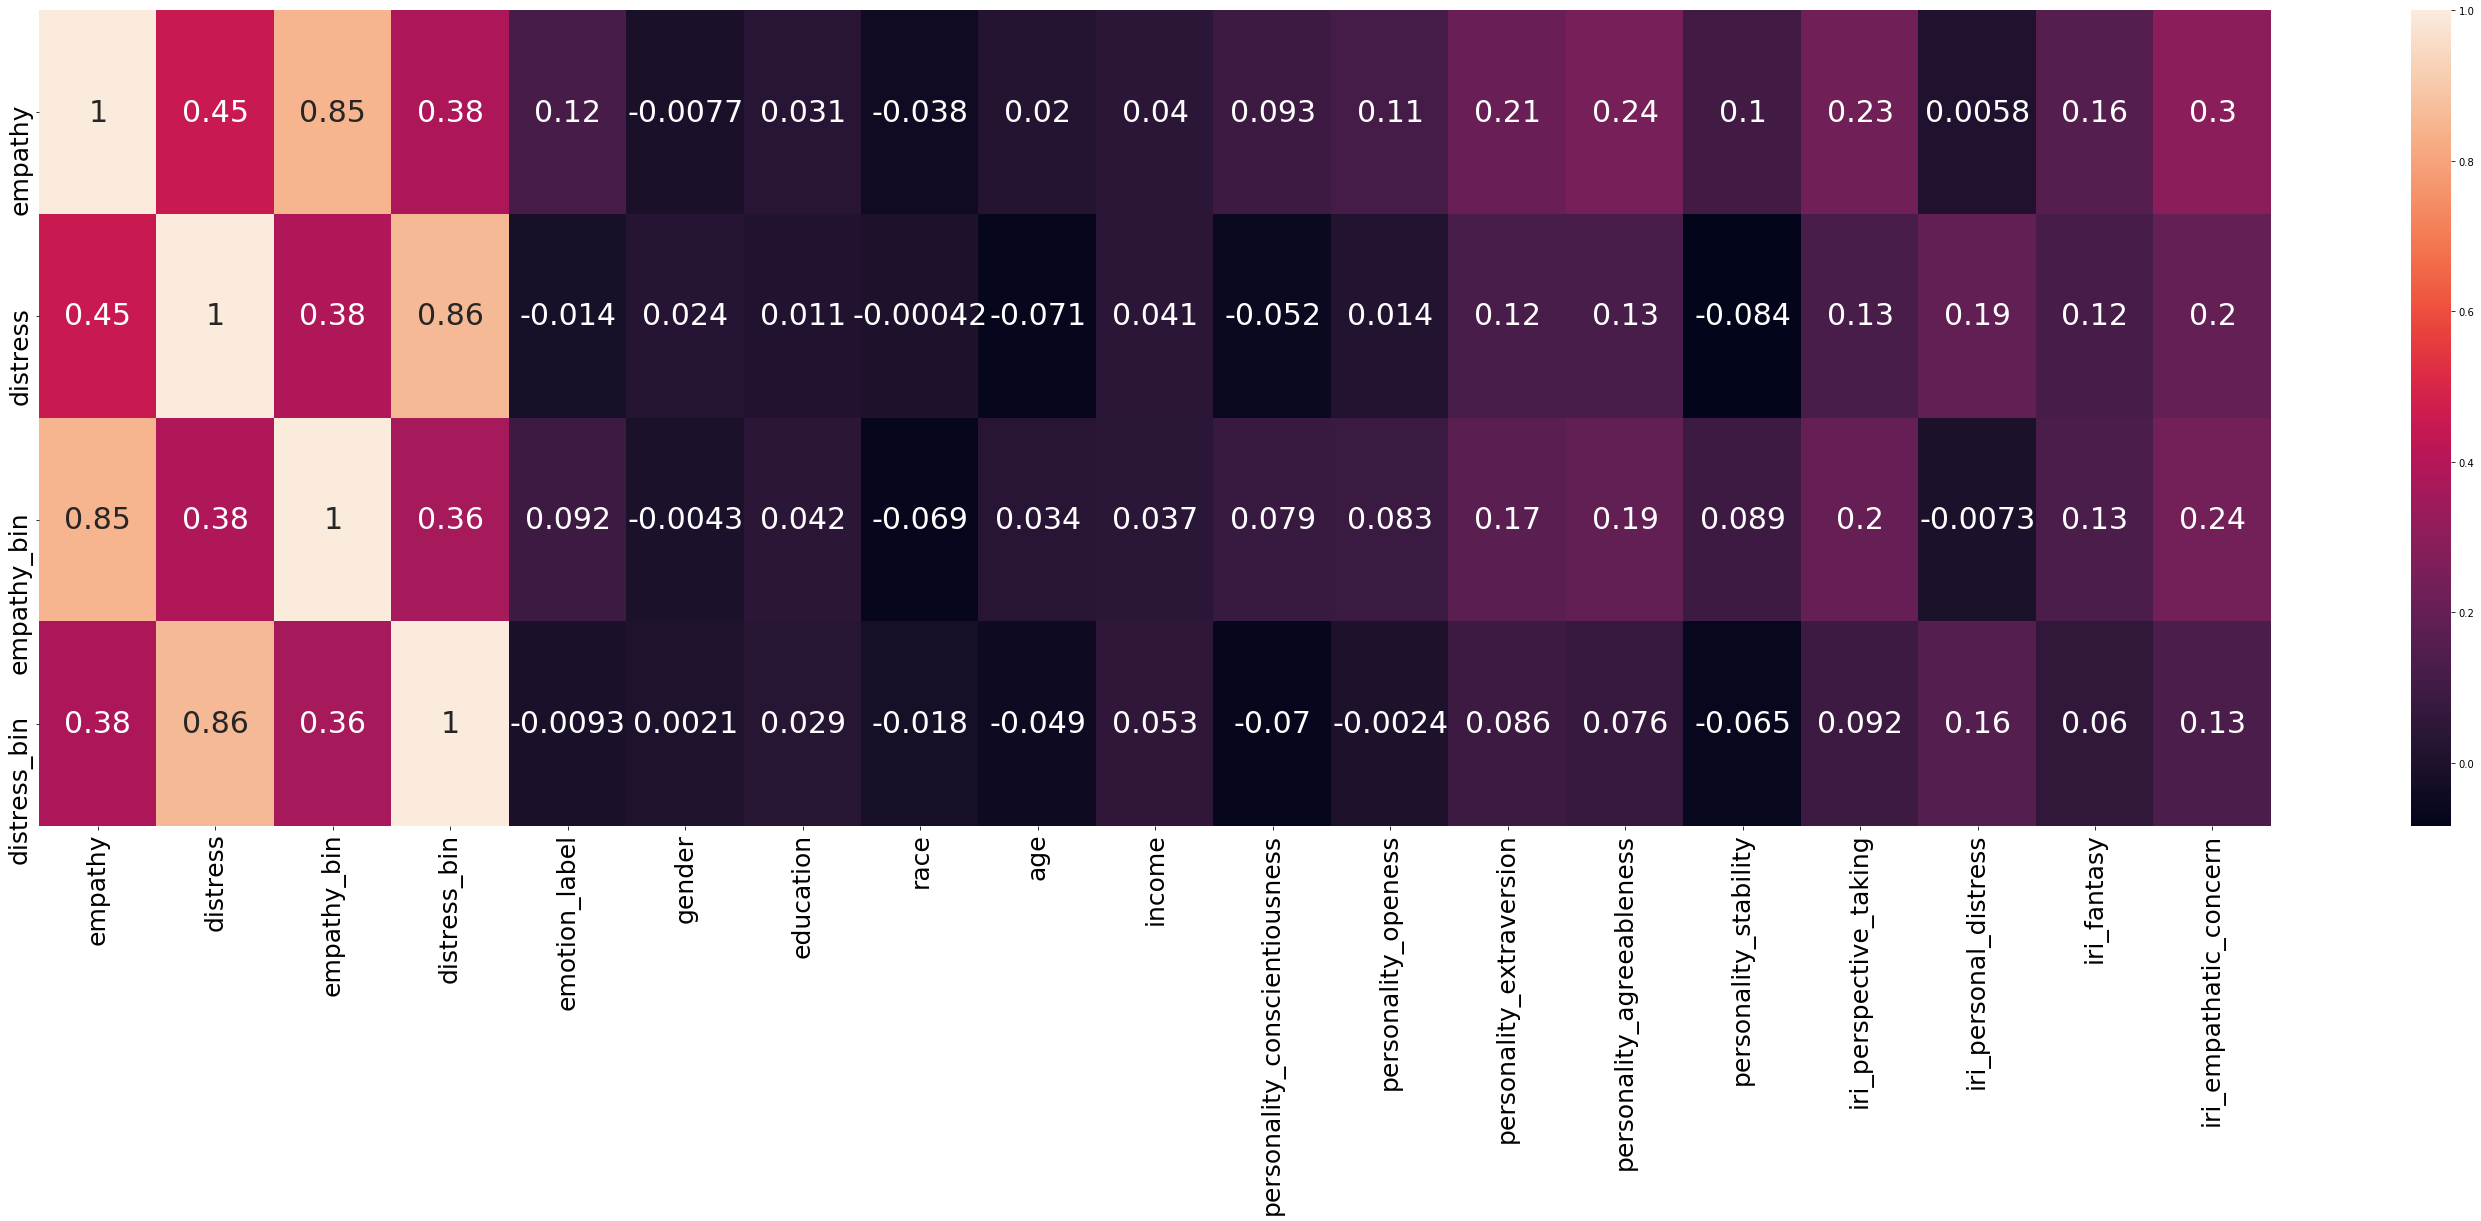

In [8]:
#draw_heatmap of correlation matrix
import pandas as pd
from heatmap import *
corrMatrix = df.corr()
draw_heatmap(corrMatrix)
#print (corrMatrix)

In [9]:
import numpy as np
import scipy.stats

In [53]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_absolute_error
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select 1a subset of features
    fs = SelectKBest(score_func=f_regression, k=100)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    xp = fs.get_params(deep=True)
    print(xp)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [54]:
x = dff[dff.columns[8:]] 

In [55]:
y = dff['empathy']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=1)


In [57]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

{'k': 100, 'score_func': <function f_regression at 0x0000025000B50438>}


C:\anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [58]:
print(X_train_fs[:5])
print(X_train[:5])

[[ 0.          0.         44.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.     

In [59]:
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.003


In [60]:
yhat

array([ 1.91196017e-16, -9.23454022e-17, -2.35214626e-16, -5.84671200e-17,
        4.99591687e-17, -1.06538042e-17,  5.29888633e-17,  2.66257502e-16,
       -4.67205268e-16,  1.05036639e-16, -4.29057831e-17,  4.48573470e-17,
        4.20995704e-16, -2.12965930e-16, -2.31990642e-16,  2.69937718e-16,
        2.88426401e-16,  7.62419641e-17,  2.12503626e-17,  1.64307803e-16,
       -1.07415812e-16,  2.22826098e-16,  4.25093988e-18,  2.60779245e-16,
        1.20632671e-17, -2.09034179e-16,  2.36642303e-17, -3.43960103e-16,
        8.37576536e-17, -7.68187597e-17,  2.75193063e-16,  2.70805080e-16,
       -1.23815888e-16, -1.11672824e-17, -2.61538187e-16, -6.86299975e-17,
       -2.47871168e-16,  1.98648389e-16,  1.16140604e-16, -1.73363927e-16,
        4.69685055e-17, -2.25131545e-16, -2.72134745e-17,  1.65283585e-16,
        3.04067535e-16,  3.47435622e-16, -7.30752264e-17, -2.78353729e-17,
       -1.33653505e-16,  1.81874914e-16,  1.11398737e-16, -2.24429850e-17,
       -2.53989538e-17,  